(213, 223)


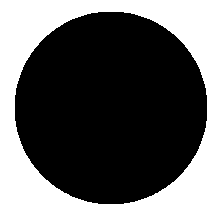

29207


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np



img=cv2.imread('circular shape.jpeg')

# plt.imshow(img)
# b,g,r = cv2.split(img)       # get b,g,r
# img = cv2.merge([r,g,b])     # switch it to rgb

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)

ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# binary=binary/255
print(binary.shape)
cv2_imshow(binary)
cv2.imwrite('binary.jpg',binary)

invert = cv2.bitwise_not(binary)

# contours, hierarchy = cv2.findContours(invert, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# image_copy = image.copy()
# image_copy = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# # print(invert.shape)
# cv2_imshow(image_copy)
# cv2_imshow(invert)
# cv2.imwrite('invert.jpg',invert)


number_of_black_pix = np.sum(binary == 0)
print(number_of_black_pix)

# resized=cv2.resize(binary,(50,100))
# cv2_imshow(resized)

In [ ]:
!unzip "/content/threshold_shape_dataset.zip" -d "/content/threshold"

Archive:  /content/threshold_shape_dataset.zip
replace /content/threshold/threshold_shape_dataset/ROI_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

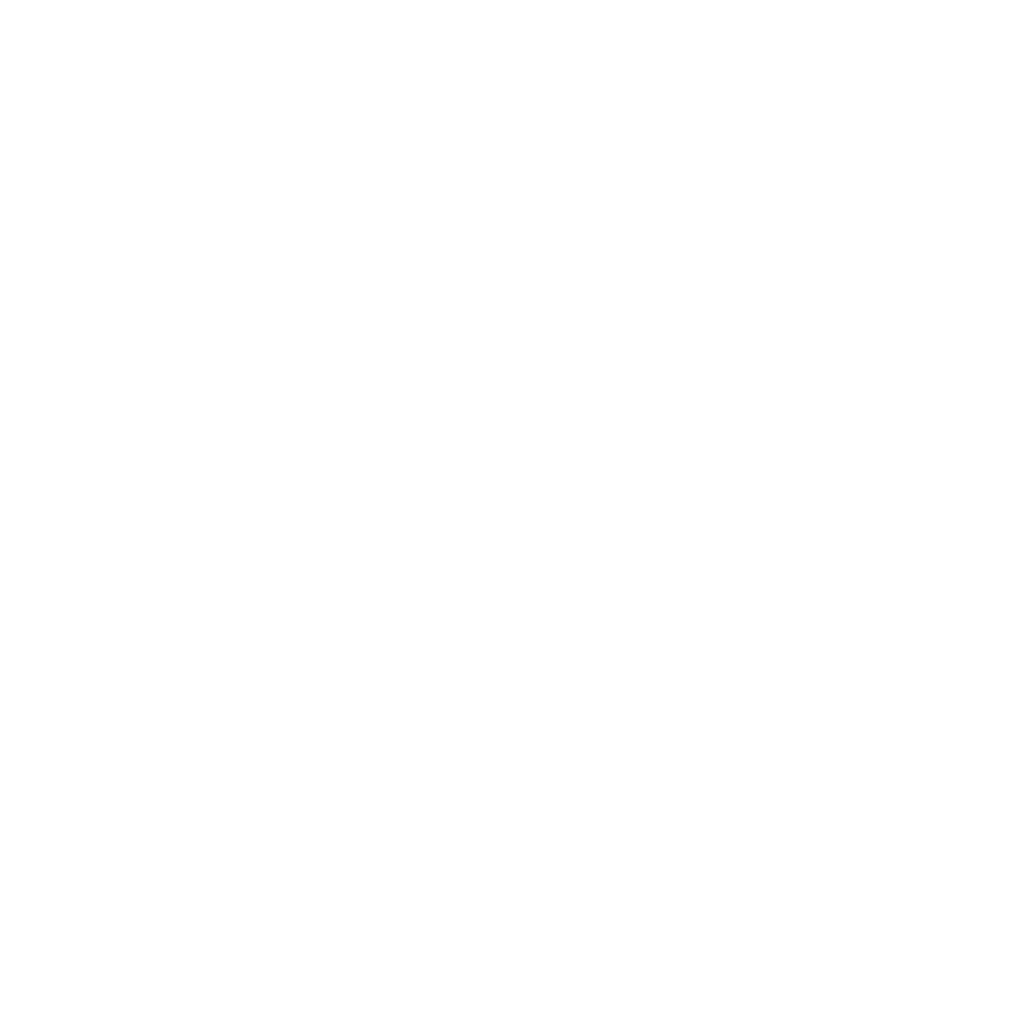

In [ ]:
width, height = 1024, 1024  # Specify the dimensions of the image
background_color = (255, 255, 255)  # RGB values for white
image = np.zeros((height, width, 3), dtype=np.uint8)
image[:] = background_color
cv2_imshow(image)
cv2.imwrite('image.jpg',image)
background=cv2.imread('image.jpg')

In [ ]:
from PIL import Image

def transparency(image_totrans):

  img = image_totrans
  img=Image.fromarray(image_totrans)
  img = img.convert("RGBA")

  datas = img.getdata()

  # img3=Image.open('back.jpeg')
  # img4=Image.open('actual.png')
  # img4=img4.resize(img3.size)

  newData = []


  for item in datas:





    if item[0] >= 100 and item[1] >= 100 and item[2] >= 100:
      newData.append((255, 255, 255, 0))
    else:
      newData.append(item)


  img.putdata(newData)

  return img

In [ ]:
import cv2
from google.colab.patches import cv2_imshow



def alphaMerge(small_foreground, background, top, left):
    """
    Puts a small BGRA picture in front of a larger BGR background.
    :param small_foreground: The overlay image. Must have 4 channels.
    :param background: The background. Must have 3 channels.
    :param top: Y position where to put the overlay.
    :param left: X position where to put the overlay.
    :return: a copy of the background with the overlay added.
    """
    result = background.copy()
    # From everything I read so far, it seems we need the alpha channel separately
    # so let's split the overlay image into its individual channels
    fg_b, fg_g, fg_r, fg_a = cv2.split(small_foreground)
    # Make the range 0...1 instead of 0...255
    fg_a = fg_a / 255.0
    # Multiply the RGB channels with the alpha channel
    label_rgb = cv2.merge([fg_b * fg_a, fg_g * fg_a, fg_r * fg_a])

    # Work on a part of the background only
    height, width = small_foreground.shape[0], small_foreground.shape[1]
    part_of_bg = result[top:top + height, left:left + width, :]
    # Same procedure as before: split the individual channels
    bg_b, bg_g, bg_r = cv2.split(part_of_bg)
    # Merge them back with opposite of the alpha channel
    part_of_bg = cv2.merge([bg_b * (1 - fg_a), bg_g * (1 - fg_a), bg_r * (1 - fg_a)])

    # Add the label and the part of the background
    cv2.add(label_rgb, part_of_bg, part_of_bg)
    # Replace a part of the background
    result[top:top + height, left:left + width, :] = part_of_bg
    return result

In [ ]:
import imutils
import random

def rotate_image(image,angle):

  invert=cv2.bitwise_not(image)

  rotated = imutils.rotate(invert, angle)
  rotated_invert=cv2.bitwise_not(rotated)
  return rotated_invert

In [ ]:

# #Bimodal
# import math
# import numpy as np
# # print(foreground.shape)
# mean=50.0
# std_dev=10.0

# mean2=75.0
# std_dev2=10.0
# foreground=cv2.imread('circular shape.jpeg')
# foreground=cv2.resize(foreground,(62,62))
# num_particles = math.ceil((((image.shape[0]*image.shape[1])/(foreground.shape[0]*foreground.shape[1]))+100)/2)
# particle_sizes = np.random.normal(mean, std_dev, num_particles)
# particle_sizes2=np.random.normal(mean2,std_dev2,num_particles)
# particle_sizes=np.append(particle_sizes,particle_sizes2)
# particle_sizes=[math.ceil(i) for i in particle_sizes]
# print(particle_sizes)
# print(len(particle_sizes))

[42, 61, 53, 44, 58, 47, 33, 50, 48, 53, 59, 38, 45, 55, 64, 57, 45, 48, 58, 61, 62, 49, 69, 50, 45, 52, 29, 56, 59, 51, 36, 37, 54, 46, 55, 45, 58, 57, 55, 60, 44, 60, 49, 68, 53, 58, 46, 49, 53, 65, 56, 40, 54, 43, 35, 54, 51, 58, 31, 65, 66, 51, 39, 55, 41, 40, 71, 46, 33, 38, 39, 61, 36, 57, 59, 37, 52, 59, 59, 57, 55, 52, 57, 45, 46, 62, 56, 49, 53, 64, 64, 42, 50, 59, 42, 45, 61, 42, 35, 56, 43, 30, 53, 57, 44, 42, 68, 51, 47, 44, 51, 61, 60, 53, 55, 42, 40, 49, 57, 28, 53, 64, 25, 50, 49, 52, 49, 66, 43, 51, 57, 51, 51, 53, 36, 65, 38, 59, 41, 62, 47, 42, 64, 48, 45, 55, 44, 42, 38, 27, 60, 41, 60, 69, 47, 43, 67, 53, 48, 55, 54, 35, 61, 51, 54, 51, 57, 56, 47, 61, 50, 35, 79, 50, 30, 58, 58, 68, 51, 52, 54, 33, 53, 55, 63, 32, 67, 83, 71, 82, 67, 86, 82, 88, 62, 60, 65, 54, 85, 78, 64, 66, 90, 75, 73, 88, 80, 83, 71, 91, 89, 71, 77, 63, 90, 71, 88, 77, 82, 77, 77, 68, 71, 83, 73, 88, 69, 70, 78, 89, 74, 57, 87, 55, 77, 85, 74, 77, 58, 68, 77, 84, 76, 94, 79, 76, 68, 72, 72, 75,

In [ ]:
#Gaussian
mean=50.0
std_dev=10.0
import math

foreground=cv2.imread('circular shape.jpeg')
foreground=cv2.resize(foreground,(50,50))
num_particles=math.ceil((image.shape[0]*image.shape[1]/(foreground.shape[0]*foreground.shape[1])))
particle_sizes=np.random.normal(mean,std_dev,num_particles)
particle_sizes=[math.ceil(i) for i in particle_sizes]
print(particle_sizes)
print(len(particle_sizes))

[37, 70, 68, 39, 50, 49, 59, 50, 59, 49, 50, 57, 36, 59, 37, 53, 50, 72, 38, 49, 46, 41, 36, 60, 44, 51, 49, 55, 38, 37, 69, 55, 55, 53, 60, 63, 50, 44, 45, 33, 48, 33, 58, 56, 38, 40, 56, 46, 46, 65, 59, 47, 75, 73, 49, 61, 51, 47, 42, 22, 68, 54, 57, 36, 52, 52, 45, 54, 61, 49, 43, 33, 62, 55, 58, 81, 65, 55, 36, 52, 43, 56, 53, 52, 48, 53, 48, 51, 56, 58, 39, 52, 43, 53, 69, 49, 67, 55, 59, 50, 41, 32, 48, 46, 51, 60, 49, 55, 57, 45, 32, 59, 42, 53, 41, 44, 49, 54, 63, 50, 59, 38, 38, 59, 74, 48, 61, 55, 29, 54, 70, 38, 42, 43, 51, 67, 60, 65, 45, 30, 49, 42, 53, 51, 30, 57, 37, 45, 58, 45, 54, 71, 50, 76, 44, 52, 46, 40, 51, 47, 35, 24, 50, 35, 44, 42, 63, 50, 55, 56, 58, 57, 53, 37, 54, 43, 36, 51, 68, 58, 37, 53, 43, 60, 56, 54, 54, 61, 59, 53, 68, 53, 58, 56, 70, 54, 55, 67, 43, 45, 44, 60, 40, 78, 46, 64, 45, 33, 22, 46, 49, 52, 61, 51, 54, 53, 44, 45, 45, 60, 58, 54, 42, 49, 53, 50, 49, 50, 45, 43, 52, 50, 51, 55, 42, 62, 51, 35, 70, 61, 73, 61, 52, 54, 58, 57, 45, 69, 60, 33,

In [ ]:
def overlap(result,x0,y0,width):

  flag=0



  for i in range(x0,x0+width):
    for j in range(y0,y0+width):

      if(result[i][j][0]==0 and result[i][j][1]==0 and result[i][j][2]==0):
        flag=1

  return flag

In [ ]:
# # for i in range(N):

# i=0
# j=0
# area_fraction=0.3

# foreground=cv2.resize(foreground,(50,50))
# print(foreground.shape[0])

# foreground=np.array(foreground)
# foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
# result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
# i+=np.sum(foreground==0)
# while i < area_fraction*(image.shape[0]*image.shape[1]*3):

#   foreground=cv2.imread('circular shape.jpeg')
#   foreground=cv2.resize(foreground,(50,50))
#   x1=random.randint(50,100)
#   # print(j)
#   # k=random.randint(0,len(particle_sizes)-1)
#   # foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
#   number_of_black_pix = np.sum(foreground ==0)

#   x0=random.randint(0,1024-foreground.shape[0])
#   y0=random.randint(0,1024-foreground.shape[1])
#   if(overlap(result,x0,y0,50)):
#     continue
#   i+=number_of_black_pix

#   angle=random.randint(-180,180)
#   foreground=rotate_image(foreground,angle)
#   foreground=transparency(foreground)
#   foreground=np.array(foreground)
#   foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
#   j=j+1




#   result=alphaMerge(foreground,result,x0,y0)

# # blur = cv2.GaussianBlur(result, (0,0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
# # ret, binary = cv2.threshold(blur, 127 ,255, cv2.THRESH_BINARY)
# # cv2_imshow(binary)
# # print(binary)
# cv2_imshow(result)

# # result=binary

# print(result[12][12][2])
# # print(i)
# # print(j)

In [ ]:
import math

50


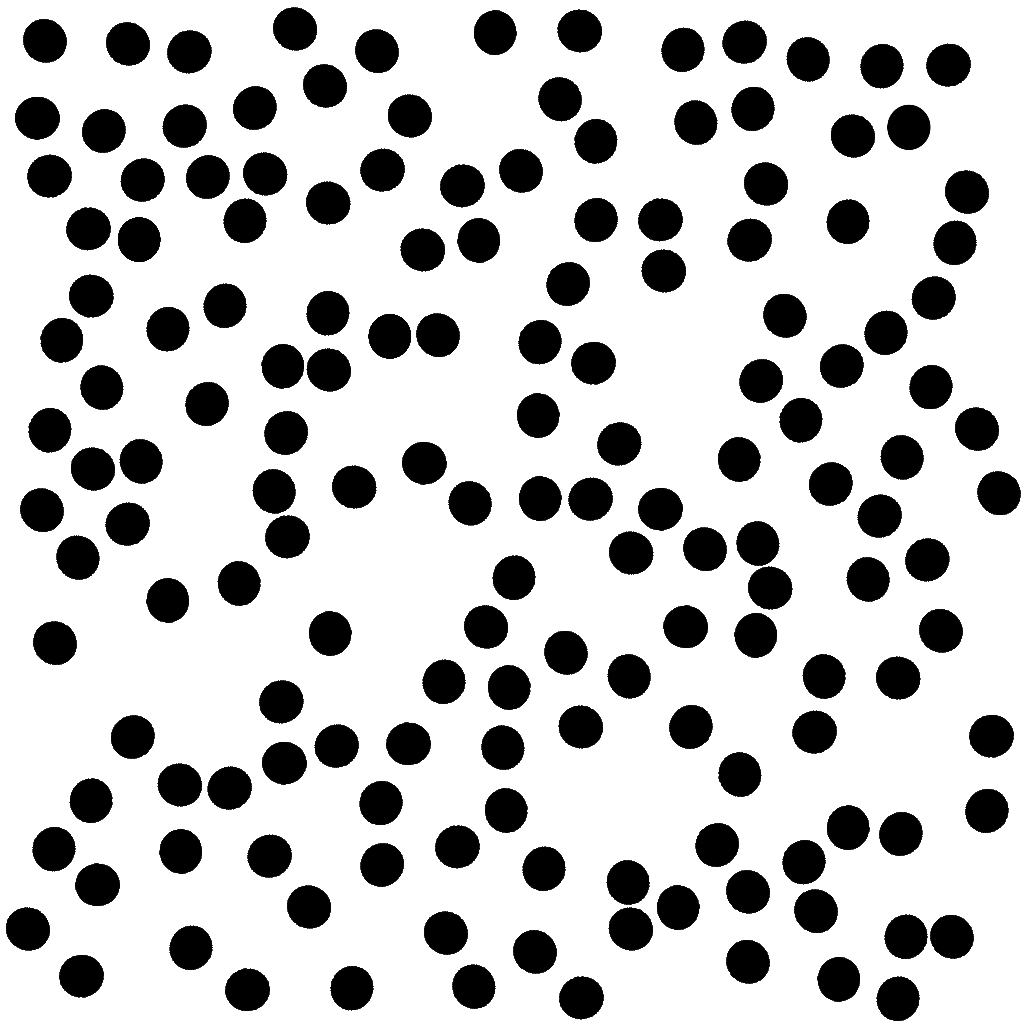

255


In [ ]:

i=0
j=0
area_fraction=0.2

foreground=cv2.imread('circular shape.jpeg')

foreground=cv2.resize(foreground,(50,50))
print(foreground.shape[0])

foreground=np.array(foreground)
foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
i+=np.sum(foreground==0)
while i < area_fraction*(image.shape[0]*image.shape[1]*3):

  foreground=cv2.imread('circular shape.jpeg')
  foreground=cv2.resize(foreground,(50,50))
  x1=random.randint(50,100)
  # print(j)
  # k=random.randint(0,len(particle_sizes)-1)
  foreground=cv2.resize(foreground,(50,50))
  number_of_black_pix = np.sum(foreground ==0)

  x0=random.randint(0,1024-foreground.shape[0])
  y0=random.randint(0,1024-foreground.shape[1])
  if(overlap(result,x0,y0,50)):
    continue
  i+=number_of_black_pix

  angle=random.randint(-180,180)
  foreground=rotate_image(foreground,angle)
  foreground=transparency(foreground)
  foreground=np.array(foreground)
  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  j=j+1




  result=alphaMerge(foreground,result,x0,y0)

# blur = cv2.GaussianBlur(result, (0,0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
# ret, binary = cv2.threshold(blur, 127 ,255, cv2.THRESH_BINARY)
# cv2_imshow(binary)
# print(binary)
cv2_imshow(result)

# result=binary
# cv2.imwrite('result.png',result)
print(result[12][12][2])
# print(i)
# print(j)

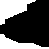

(49, 49, 3)


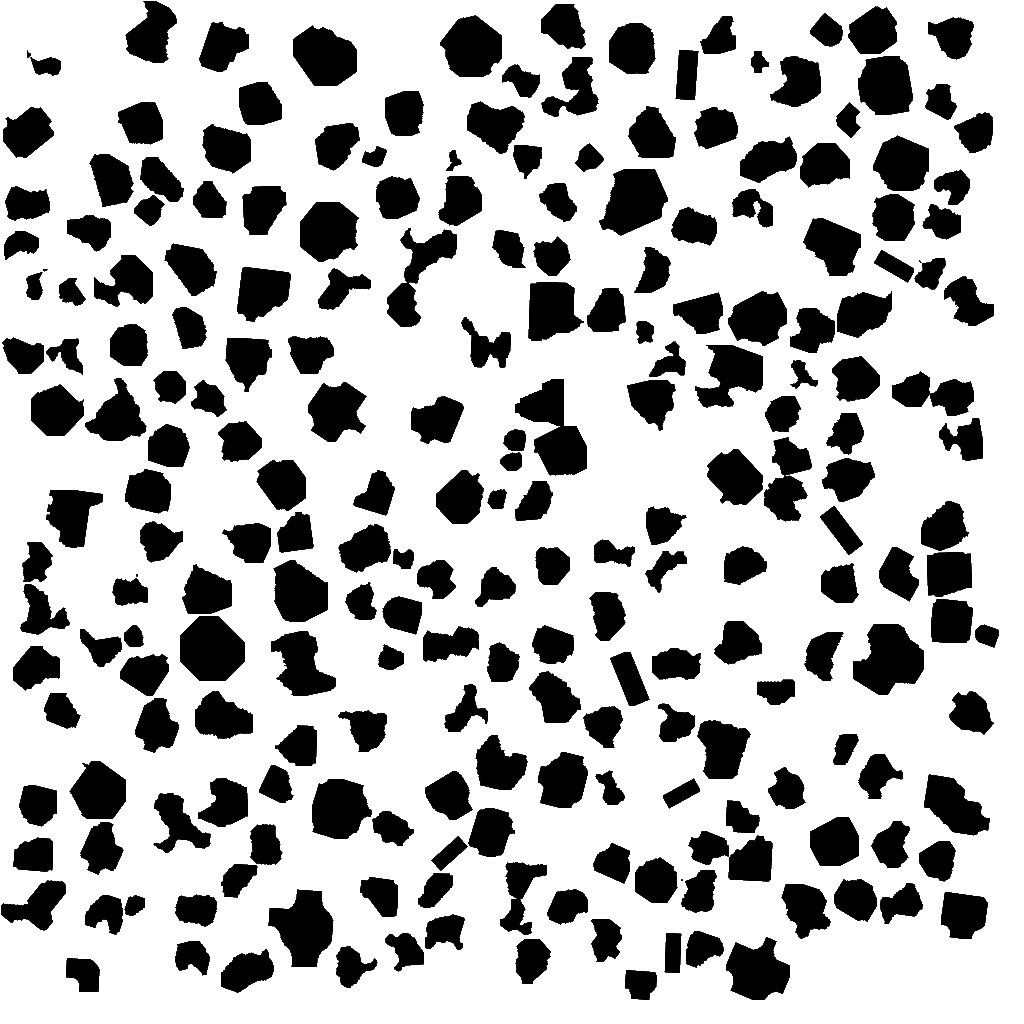

(1024, 1024, 3)
0.3
903798
255
946629
228


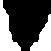

(51, 51, 3)


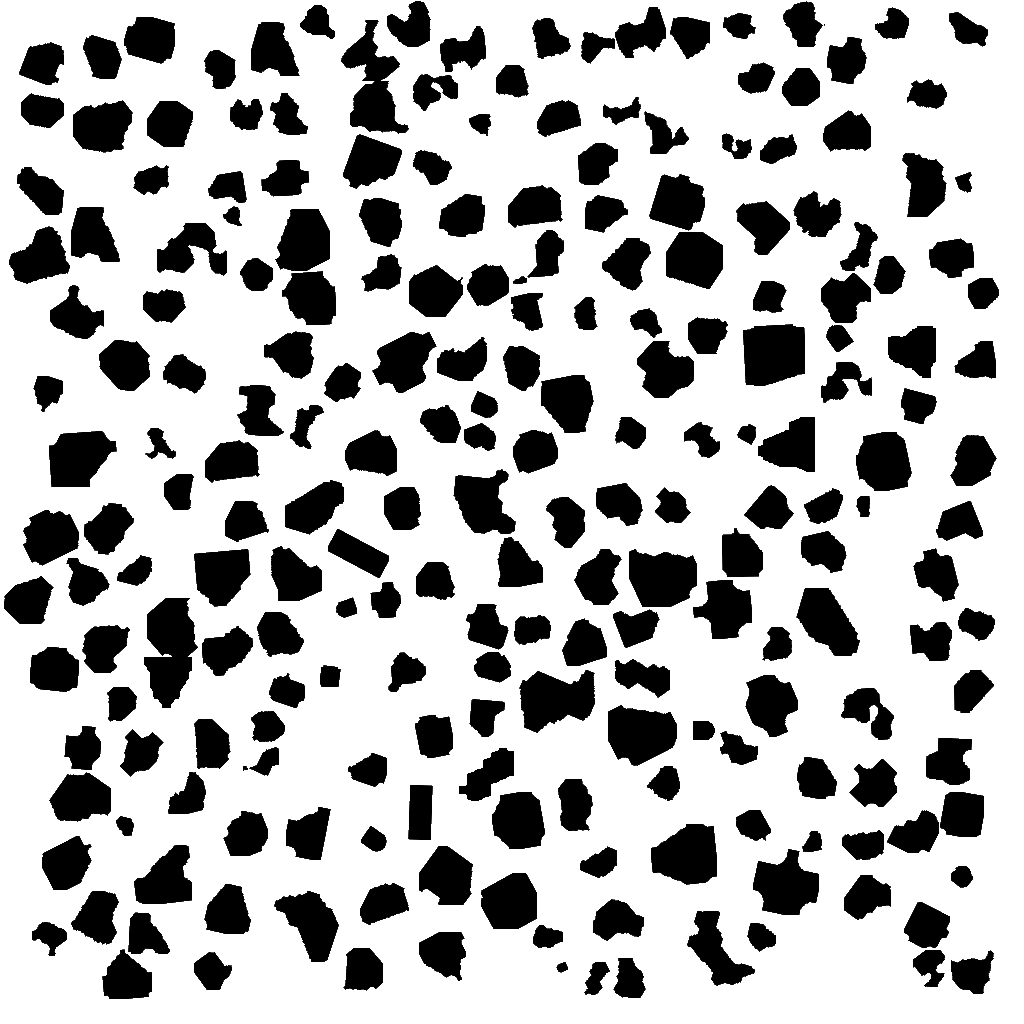

(1024, 1024, 3)
0.3
906231
255
947601
222


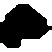

(52, 52, 3)


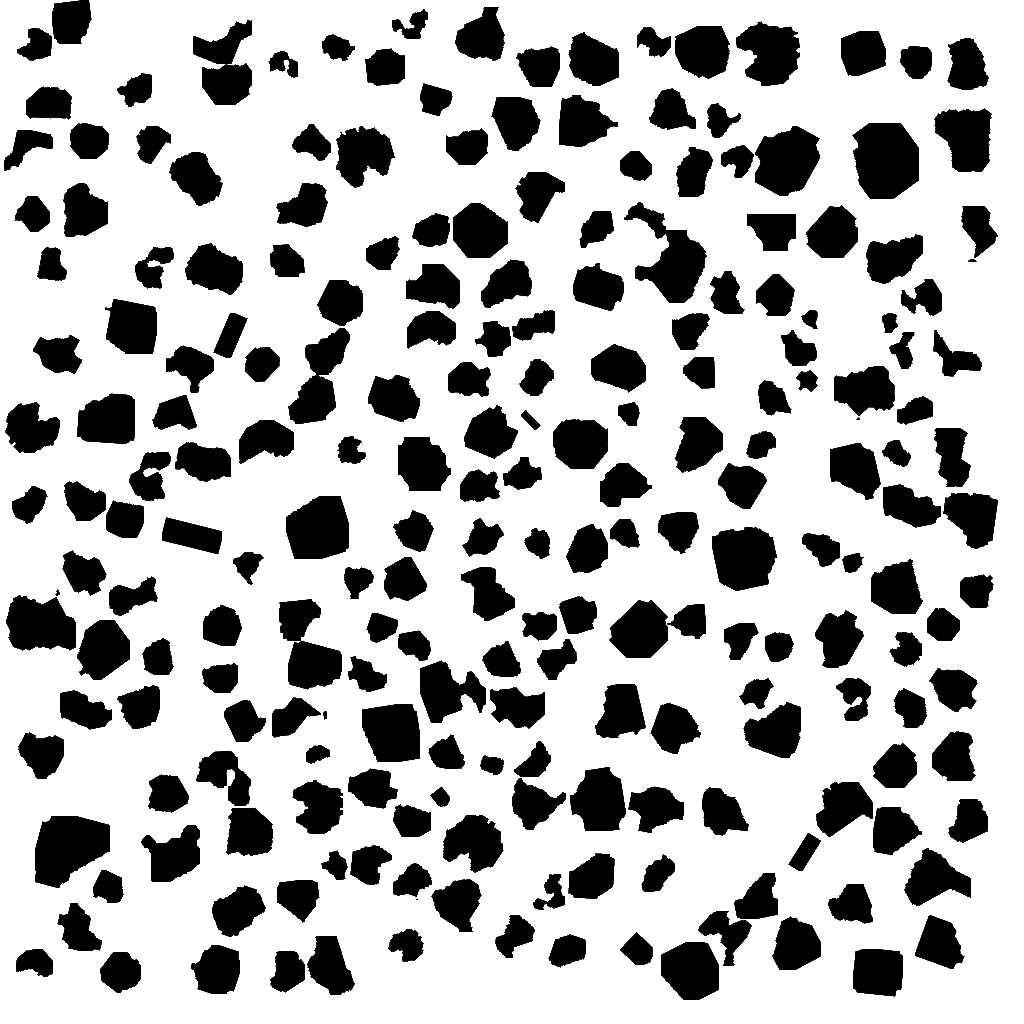

(1024, 1024, 3)
0.3
899076
255
945969
220


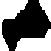

(51, 51, 3)


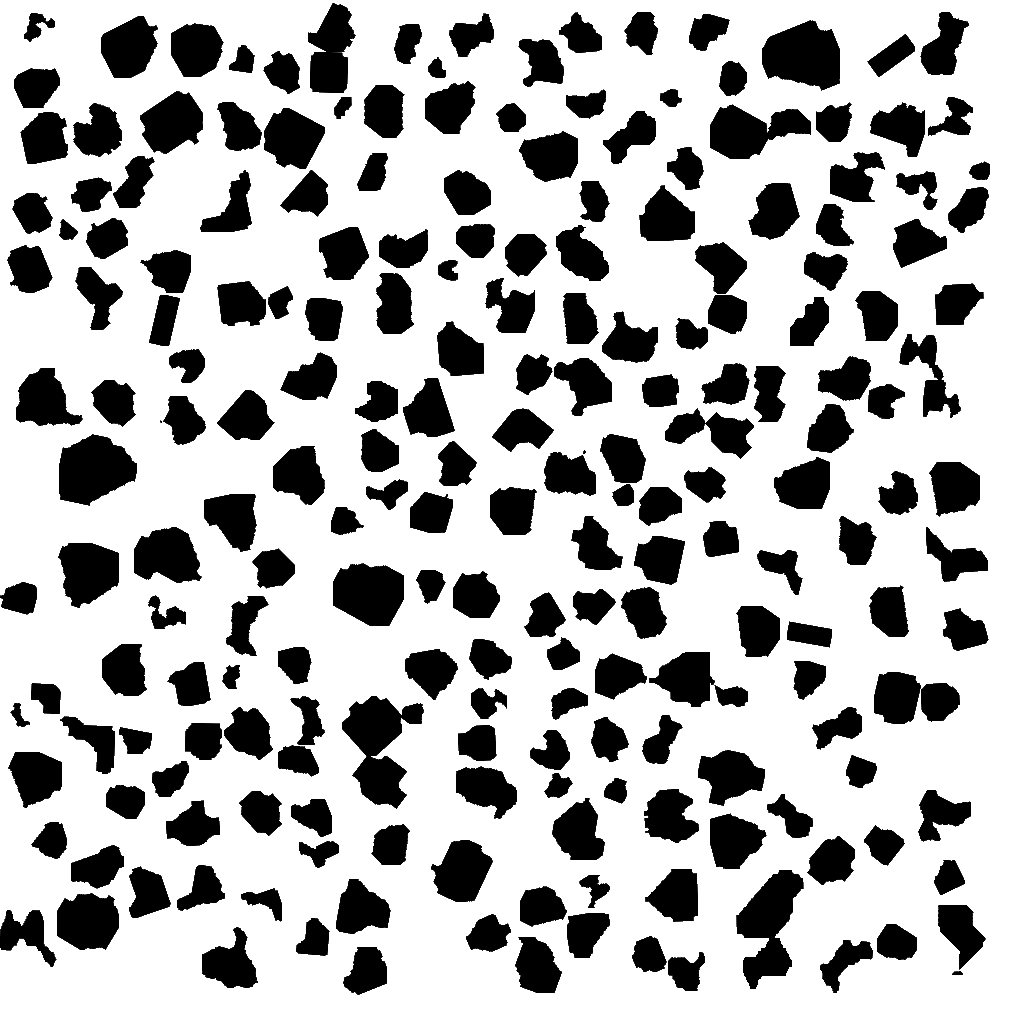

(1024, 1024, 3)
0.3
904656
255
946290
220


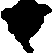

(53, 53, 3)


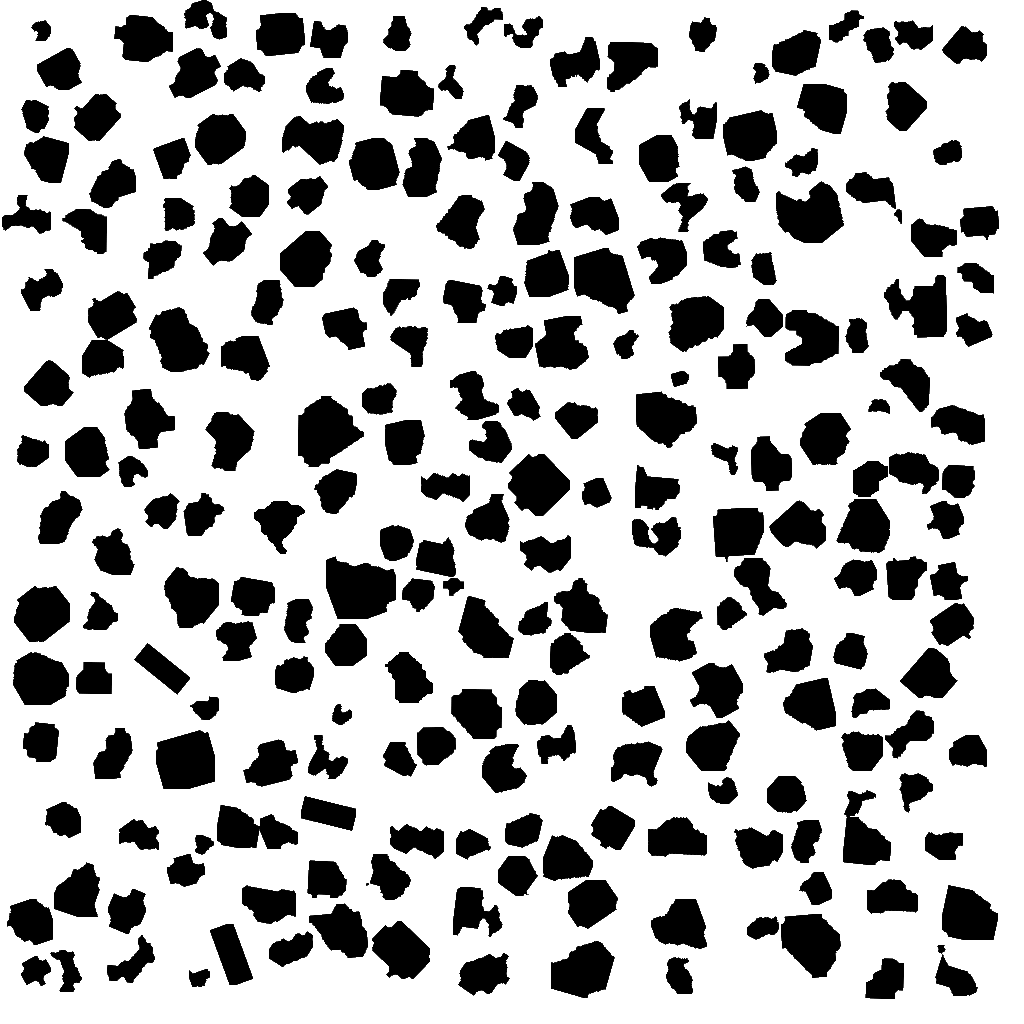

(1024, 1024, 3)
0.3
908712
255
948099
231


In [ ]:
import glob

for l in range(1,6):


  i=0
  j=0
  area_fraction=0.3

  # foreground=cv2.imread('circular shape.jpeg')
  foreground_path_list = glob.glob('threshold/threshold_shape_dataset/*.png')
  foreground_image_path = random.choice(foreground_path_list)
  foreground=cv2.imread(foreground_image_path)
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
  k=random.randint(0,len(particle_sizes)-1)

  foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))

  _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
  foreground[:, :, 0] = thresholded_image
  foreground[:, :, 1] = thresholded_image
  foreground[:, :, 2] = thresholded_image
  cv2_imshow(foreground)

  print(foreground.shape)


  foreground=np.array(foreground)
  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
  i+=np.sum(foreground==0)
  while i < area_fraction*(image.shape[0]*image.shape[1]*3):
    foreground_image_path = random.choice(foreground_path_list)

    foreground=cv2.imread(foreground_image_path)
    # foreground=cv2.resize(foreground,(50,50))
    x1=random.randint(50,100)
    # print(j)
    k=random.randint(0,len(particle_sizes)-1)
    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
    foreground[:, :, 0] = thresholded_image
    foreground[:, :, 1] = thresholded_image
    foreground[:, :, 2] = thresholded_image
    number_of_black_pix = np.sum(foreground ==0)

    x0=random.randint(0,1000-foreground.shape[0])
    y0=random.randint(0,1000-foreground.shape[1])
    if(overlap(result,x0,y0,particle_sizes[k])):
      continue
    i+=number_of_black_pix

    angle=random.randint(-180,180)
    foreground=rotate_image(foreground,angle)
    foreground=transparency(foreground)
    foreground=np.array(foreground)
    foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
    j=j+1




    result=alphaMerge(foreground,result,x0,y0)

  # blur = cv2.GaussianBlur(result, (0,0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
  # ret, binary = cv2.threshold(blur, 127 ,255, cv2.THRESH_BINARY)
  # cv2_imshow(binary)
  # print(binary)
  cv2_imshow(result)

  print(result.shape)
  print(area_fraction)
  print(np.sum(result<127))
  actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
  actual_area_fraction=round(actual_area_fraction,2)
  actual_area_fraction

  cv2.imwrite(f'irregular_gaussian_distributionhomogeneous_{actual_area_fraction}_{l}.png',result)

  # result=binary
  # cv2.imwrite('result.png',result)
  print(result[12][12][2])
  print(i)
  print(j)

In [ ]:
l

In [ ]:
  print(result.shape)
  print(area_fraction)
  print(np.sum(result<127))
  actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
  actual_area_fraction=round(actual_area_fraction,2)
  actual_area_fraction

  cv2.imwrite(f'circular_bimodal_distributionhyperbolic_{actual_area_fraction}_{l}.png',result)

(1024, 1024, 3)
0.2
2842083


True

In [ ]:
foreground_path_list = glob.glob('shape_dataset_invert/content/shape_dataset/*.png')
print(foreground_path_list)

['shape_dataset_invert/content/shape_dataset/ROI_15.png', 'shape_dataset_invert/content/shape_dataset/ROI_52.png', 'shape_dataset_invert/content/shape_dataset/ROI_92.png', 'shape_dataset_invert/content/shape_dataset/ROI_3.png', 'shape_dataset_invert/content/shape_dataset/ROI_9.png', 'shape_dataset_invert/content/shape_dataset/ROI_56.png', 'shape_dataset_invert/content/shape_dataset/ROI_101.png', 'shape_dataset_invert/content/shape_dataset/ROI_95.png', 'shape_dataset_invert/content/shape_dataset/ROI_43.png', 'shape_dataset_invert/content/shape_dataset/ROI_25.png', 'shape_dataset_invert/content/shape_dataset/ROI_34.png', 'shape_dataset_invert/content/shape_dataset/ROI_37.png', 'shape_dataset_invert/content/shape_dataset/ROI_102.png', 'shape_dataset_invert/content/shape_dataset/ROI_96.png', 'shape_dataset_invert/content/shape_dataset/ROI_6.png', 'shape_dataset_invert/content/shape_dataset/ROI_66.png', 'shape_dataset_invert/content/shape_dataset/ROI_40.png', 'shape_dataset_invert/content/s

In [ ]:
#Check area_fraction
print(result.shape)
print(area_fraction)
print(np.sum(result<127))
actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
actual_area_fraction=round(actual_area_fraction,2)
actual_area_fraction


(1024, 1024, 3)
0.2
730116


0.23

In [ ]:

cv2.imwrite(f'circular_gaussian_homogeneous_{actual_area_fraction}_{l}.png',result)
l=l+1

In [ ]:
l

3

In [ ]:
import os
import shutil

folder_path = "/content"  # Specify the path to the folder containing the files
save_folder = "/content/irregular"  # Path to the folder where irregular files will be saved

# Create the save folder if it doesn't exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("irregular"):
        file_path = os.path.join(folder_path, filename)
        save_path = os.path.join(save_folder, filename)
        # shutil.copyfile(file_path, save_path)
        print(f"File '{filename}' saved to 'irregular' folder.")


File 'irregular_bimodal_distributionhomogeneous_0.19_5.png' saved to 'irregular' folder.
File 'irregular_bimodal_distributionhomogeneous_0.19_4.png' saved to 'irregular' folder.
File 'irregular_bimodal_distributionhomogeneous_0.28_4.png' saved to 'irregular' folder.
File 'irregular_bimodal_distributionhomogeneous_0.28_1.png' saved to 'irregular' folder.
File 'irregular_gaussian_distributionhomogeneous_0.19_3.png' saved to 'irregular' folder.
File 'irregular_gaussian_distributionhomogeneous_0.1_3.png' saved to 'irregular' folder.
File 'irregular_gaussian_distributionhomogeneous_0.1_5.png' saved to 'irregular' folder.
File 'irregular_gaussian_distributionhomogeneous_0.19_2.png' saved to 'irregular' folder.
File 'irregular_bimodal_distributionhomogeneous_0.19_3.png' saved to 'irregular' folder.
File 'irregular_gaussian_distributionhomogeneous_0.1_4.png' saved to 'irregular' folder.
File 'irregular_bimodal_distributionhomogeneous_0.28_5.png' saved to 'irregular' folder.
File 'irregular_bim